In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_csv("GOOGL Historical Data.csv")
df.head()

,Date,Close,Open,High,Low,Volume,Change(%)
0,2004-08-20,54.2,50.8,54.6,50.3,11430000.0,7.95
1,2004-08-23,54.8,55.4,56.8,54.6,9140000.0,1.00
2,2004-08-24,52.5,55.7,55.8,51.8,7630000.0,-4.13
3,2004-08-25,53.0,52.5,54.0,52.0,4600000.0,1.07
4,2004-08-26,54.0,52.5,54.0,52.4,3550000.0,1.81


In [4]:
df.value_counts()

Date        Close   Open    High    Low     Volume      Change(%)
2004-08-20  54.2    50.8    54.6    50.3    11430000.0   7.95        1
2016-02-26  724.9   733.6   736.2   721.9   2120000.0   -0.58        1
2016-02-05  703.8   725.5   726.7   700.1   5480000.0   -3.60        1
2016-02-08  704.2   687.7   704.5   682.0   4470000.0    0.06        1
2016-02-09  701.0   693.0   721.0   688.5   4210000.0   -0.45        1
                                                                    ..
2010-05-26  238.0   241.3   245.1   237.7   3480000.0   -0.34        1
2010-05-27  245.5   242.7   246.4   240.8   2810000.0    3.15        1
2010-05-28  243.1   246.6   247.0   241.7   2890000.0   -0.99        1
2010-06-01  241.4   240.4   245.8   240.3   2670000.0   -0.67        1
2021-11-11  2920.8  2931.1  2948.4  2920.8  478110.0     0.10        1
Length: 4340, dtype: int64

In [5]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 4340

Display of dataset: 


,Date,Close,Open,High,Low,Volume,Change(%)
0,2004-08-20,54.2,50.8,54.6,50.3,11430000.0,7.95
1,2004-08-23,54.8,55.4,56.8,54.6,9140000.0,1.00
2,2004-08-24,52.5,55.7,55.8,51.8,7630000.0,-4.13
3,2004-08-25,53.0,52.5,54.0,52.0,4600000.0,1.07
4,2004-08-26,54.0,52.5,54.0,52.4,3550000.0,1.81



Basics statistics: 


,Date,Close,Open,High,Low,Volume,Change(%)
count,4340,4340.000000,4340.000000,4340.000000,4340.000000,4.340000e+03,4340.000000
unique,4340,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,649.406982,649.314378,655.383802,643.002857,3.687341e+06,0.111694
std,NaN,575.281336,574.864983,579.929549,569.886066,3.685623e+06,1.906274
min,NaN,50.000000,49.600000,50.900000,49.500000,4.656400e+05,-11.630000
25%,NaN,246.075000,246.500000,249.175000,243.100000,1.610000e+06,-0.750000
50%,NaN,405.750000,405.250000,408.350000,403.250000,2.340000e+06,0.085000
75%,NaN,954.875000,953.425000,960.175000,946.500000,4.312500e+06,0.990000



Percentage of missing values: 


Date         0.0
Close        0.0
Open         0.0
High         0.0
Low          0.0
Volume       0.0
Change(%)    0.0
dtype: float64

In [6]:
df['Date'].dtype #This is a string

dtype('O')

In [7]:
df2 = pd.read_csv("GOOGL Historical Data.csv", header=0, parse_dates = [0])

In [8]:
df2

,Date,Close,Open,High,Low,Volume,Change(%)
0,2004-08-20,54.2,50.8,54.6,50.3,11430000.0,7.95
1,2004-08-23,54.8,55.4,56.8,54.6,9140000.0,1.00
2,2004-08-24,52.5,55.7,55.8,51.8,7630000.0,-4.13
3,2004-08-25,53.0,52.5,54.0,52.0,4600000.0,1.07
4,2004-08-26,54.0,52.5,54.0,52.4,3550000.0,1.81
...,...,...,...,...,...,...,...
4335,2021-11-05,2977.0,2983.4,3006.6,2963.9,1920000.0,0.39
4336,2021-11-08,2980.6,2996.5,3012.3,2968.6,1150000.0,0.12
4337,2021-11-09,2978.4,2984.7,2996.7,2944.9,972090.0,-0.08
4338,2021-11-10,2917.9,2950.0,2961.4,2890.8,1480000.0,-2.03


In [9]:
df2['Date'].iloc[0]

Timestamp('2004-08-20 00:00:00')

In [10]:
df2['Date'].dtype

dtype('<M8[ns]')

In [11]:
df2

,Date,Close,Open,High,Low,Volume,Change(%)
0,2004-08-20,54.2,50.8,54.6,50.3,11430000.0,7.95
1,2004-08-23,54.8,55.4,56.8,54.6,9140000.0,1.00
2,2004-08-24,52.5,55.7,55.8,51.8,7630000.0,-4.13
3,2004-08-25,53.0,52.5,54.0,52.0,4600000.0,1.07
4,2004-08-26,54.0,52.5,54.0,52.4,3550000.0,1.81
...,...,...,...,...,...,...,...
4335,2021-11-05,2977.0,2983.4,3006.6,2963.9,1920000.0,0.39
4336,2021-11-08,2980.6,2996.5,3012.3,2968.6,1150000.0,0.12
4337,2021-11-09,2978.4,2984.7,2996.7,2944.9,972090.0,-0.08
4338,2021-11-10,2917.9,2950.0,2961.4,2890.8,1480000.0,-2.03


In [12]:
"""start_date = "2010-01-1"
end_date = "2010-12-31"

after_start_date = df2["Date"] >= start_date
before_end_date = df2["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df2.loc[between_two_dates]"""

'start_date = "2010-01-1"\nend_date = "2010-12-31"\n\nafter_start_date = df2["Date"] >= start_date\nbefore_end_date = df2["Date"] <= end_date\nbetween_two_dates = after_start_date & before_end_date\nfiltered_dates = df2.loc[between_two_dates]'

In [13]:
#filtered_dates

In [14]:
df2['year'] = pd.DatetimeIndex(df2['Date']).year
df2['month'] = pd.DatetimeIndex(df2['Date']).month
df2['day'] = pd.DatetimeIndex(df2['Date']).dayofweek
#df3['weekday'] = pd.DatetimeIndex(df3['Date1']).weekday
df2["weekday"] = df2["Date"].dt.day_name()

In [15]:

df2.head()

,Date,Close,Open,High,Low,Volume,Change(%),year,month,day,weekday
0,2004-08-20,54.2,50.8,54.6,50.3,11430000.0,7.95,2004,8,4,Friday
1,2004-08-23,54.8,55.4,56.8,54.6,9140000.0,1.00,2004,8,0,Monday
2,2004-08-24,52.5,55.7,55.8,51.8,7630000.0,-4.13,2004,8,1,Tuesday
3,2004-08-25,53.0,52.5,54.0,52.0,4600000.0,1.07,2004,8,2,Wednesday
4,2004-08-26,54.0,52.5,54.0,52.4,3550000.0,1.81,2004,8,3,Thursday


In [16]:
start_date = "2010-01-1"
end_date = "2010-12-31"
df_filter = df2[(df2['Date'] > start_date) & (df2['Date'] < end_date)]

In [17]:
df_filter

,Date,Close,Open,High,Low,Volume,Change(%),year,month,day,weekday
1352,2010-01-04,313.7,313.8,315.1,312.4,1960000.0,1.09,2010,1,0,Monday
1353,2010-01-05,312.3,313.9,314.2,311.1,3010000.0,-0.44,2010,1,1,Tuesday
1354,2010-01-06,304.4,313.2,313.2,303.5,3980000.0,-2.52,2010,1,2,Wednesday
1355,2010-01-07,297.3,305.0,305.3,296.6,6420000.0,-2.33,2010,1,3,Thursday
1356,2010-01-08,301.3,296.3,301.9,294.8,4720000.0,1.33,2010,1,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...
1598,2010-12-23,302.4,303.0,303.3,301.3,1110000.0,-0.21,2010,12,3,Thursday
1599,2010-12-27,301.5,301.7,302.2,300.0,1210000.0,-0.31,2010,12,0,Monday
1600,2010-12-28,299.8,301.3,302.2,299.3,1060000.0,-0.57,2010,12,1,Tuesday
1601,2010-12-29,300.8,301.3,301.5,299.8,1020000.0,0.35,2010,12,2,Wednesday


In [18]:
df3 = df2.copy()

df3

,Date,Close,Open,High,Low,Volume,Change(%),year,month,day,weekday
0,2004-08-20,54.2,50.8,54.6,50.3,11430000.0,7.95,2004,8,4,Friday
1,2004-08-23,54.8,55.4,56.8,54.6,9140000.0,1.00,2004,8,0,Monday
2,2004-08-24,52.5,55.7,55.8,51.8,7630000.0,-4.13,2004,8,1,Tuesday
3,2004-08-25,53.0,52.5,54.0,52.0,4600000.0,1.07,2004,8,2,Wednesday
4,2004-08-26,54.0,52.5,54.0,52.4,3550000.0,1.81,2004,8,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
4335,2021-11-05,2977.0,2983.4,3006.6,2963.9,1920000.0,0.39,2021,11,4,Friday
4336,2021-11-08,2980.6,2996.5,3012.3,2968.6,1150000.0,0.12,2021,11,0,Monday
4337,2021-11-09,2978.4,2984.7,2996.7,2944.9,972090.0,-0.08,2021,11,1,Tuesday
4338,2021-11-10,2917.9,2950.0,2961.4,2890.8,1480000.0,-2.03,2021,11,2,Wednesday


In [19]:
df3.set_index('Date',inplace = True)

In [20]:
df3

,Close,Open,High,Low,Volume,Change(%),year,month,day,weekday
Date,,,,,,,,,,
2004-08-20,54.2,50.8,54.6,50.3,11430000.0,7.95,2004,8,4,Friday
2004-08-23,54.8,55.4,56.8,54.6,9140000.0,1.00,2004,8,0,Monday
2004-08-24,52.5,55.7,55.8,51.8,7630000.0,-4.13,2004,8,1,Tuesday
2004-08-25,53.0,52.5,54.0,52.0,4600000.0,1.07,2004,8,2,Wednesday
2004-08-26,54.0,52.5,54.0,52.4,3550000.0,1.81,2004,8,3,Thursday
...,...,...,...,...,...,...,...,...,...,...
2021-11-05,2977.0,2983.4,3006.6,2963.9,1920000.0,0.39,2021,11,4,Friday
2021-11-08,2980.6,2996.5,3012.3,2968.6,1150000.0,0.12,2021,11,0,Monday
2021-11-09,2978.4,2984.7,2996.7,2944.9,972090.0,-0.08,2021,11,1,Tuesday


<AxesSubplot:xlabel='Date'>

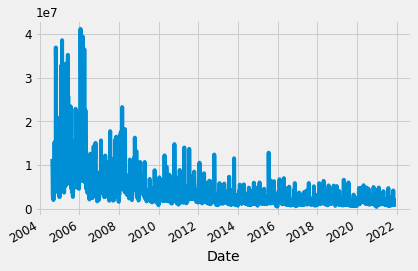

In [21]:
df3['Volume'].plot()

<AxesSubplot:xlabel='Date'>

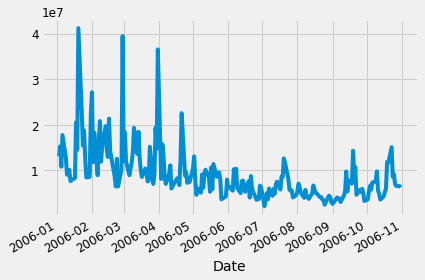

In [22]:
df3_filter = df3.loc['2006-01-01':'2006-10-31']
df3_filter['Volume'].plot()

<AxesSubplot:xlabel='Date'>

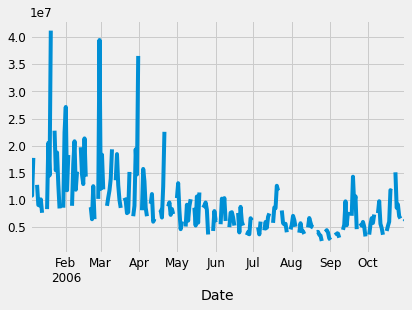

In [23]:
df3_filter = df3.loc['2006-01-01':'2006-10-31']
df3_filter['Volume'].resample('D').apply(np.mean).plot() # Les trous -> Week-end.

In [24]:
df3_filter['Volume'].mean()

9160380.952380951

<AxesSubplot:xlabel='Date'>

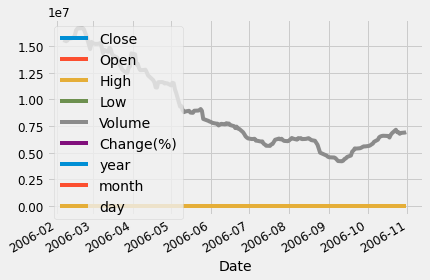

In [25]:
df4 = df3_filter[df3_filter['Volume'] >1500000]
pd.Series.rolling(df4, window=25).mean().plot()

<AxesSubplot:xlabel='Date'>

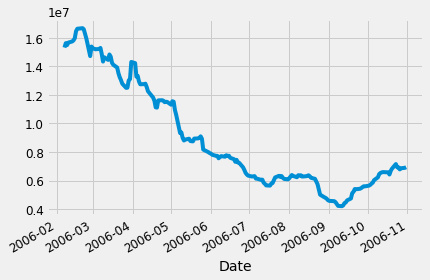

In [26]:
df4 = df3_filter[df3_filter['Volume'] >1500000]
pd.Series.rolling(df4['Volume'], window=25).mean().plot()

<AxesSubplot:xlabel='Date'>

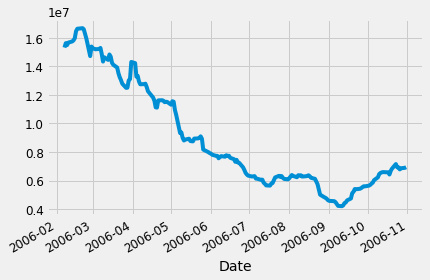

In [27]:
#df4 = df3_filter[df3_filter['Volume'] >1500000]
pd.Series.rolling(df4['Volume'], window=25).mean().plot()

<AxesSubplot:xlabel='Date'>

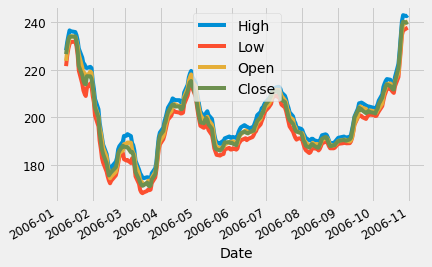

In [28]:
pd.Series.rolling(df4[['High','Low','Open','Close']], window=5).mean().plot()

<AxesSubplot:xlabel='Date'>

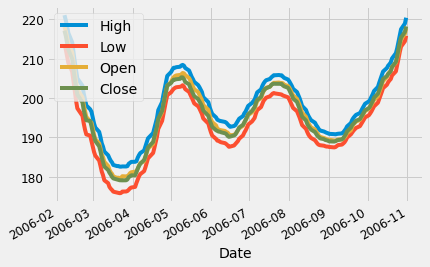

In [29]:
pd.Series.rolling(df4[['High','Low','Open','Close']], window=25).mean().plot()

In [30]:
df3

,Close,Open,High,Low,Volume,Change(%),year,month,day,weekday
Date,,,,,,,,,,
2004-08-20,54.2,50.8,54.6,50.3,11430000.0,7.95,2004,8,4,Friday
2004-08-23,54.8,55.4,56.8,54.6,9140000.0,1.00,2004,8,0,Monday
2004-08-24,52.5,55.7,55.8,51.8,7630000.0,-4.13,2004,8,1,Tuesday
2004-08-25,53.0,52.5,54.0,52.0,4600000.0,1.07,2004,8,2,Wednesday
2004-08-26,54.0,52.5,54.0,52.4,3550000.0,1.81,2004,8,3,Thursday
...,...,...,...,...,...,...,...,...,...,...
2021-11-05,2977.0,2983.4,3006.6,2963.9,1920000.0,0.39,2021,11,4,Friday
2021-11-08,2980.6,2996.5,3012.3,2968.6,1150000.0,0.12,2021,11,0,Monday
2021-11-09,2978.4,2984.7,2996.7,2944.9,972090.0,-0.08,2021,11,1,Tuesday


<AxesSubplot:xlabel='Date'>

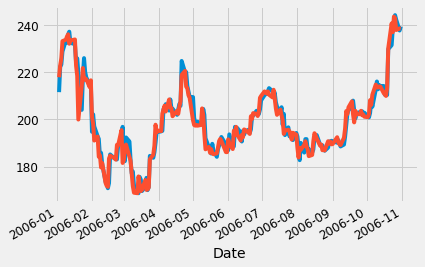

In [31]:
df3_filter.Open.plot()
df3_filter.Close.plot()

<AxesSubplot:xlabel='Date'>

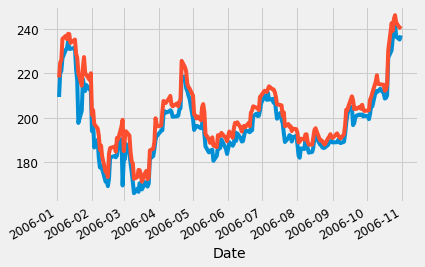

In [32]:
df3_filter.Low.plot()
df3_filter.High.plot()

In [33]:
summr = df3.groupby('Date')['Volume'].mean().reset_index()
summr

,Date,Volume
0,2004-08-20,11430000.0
1,2004-08-23,9140000.0
2,2004-08-24,7630000.0
3,2004-08-25,4600000.0
4,2004-08-26,3550000.0
...,...,...
4335,2021-11-05,1920000.0
4336,2021-11-08,1150000.0
4337,2021-11-09,972090.0
4338,2021-11-10,1480000.0


Text(0.5, 0, 'Month')

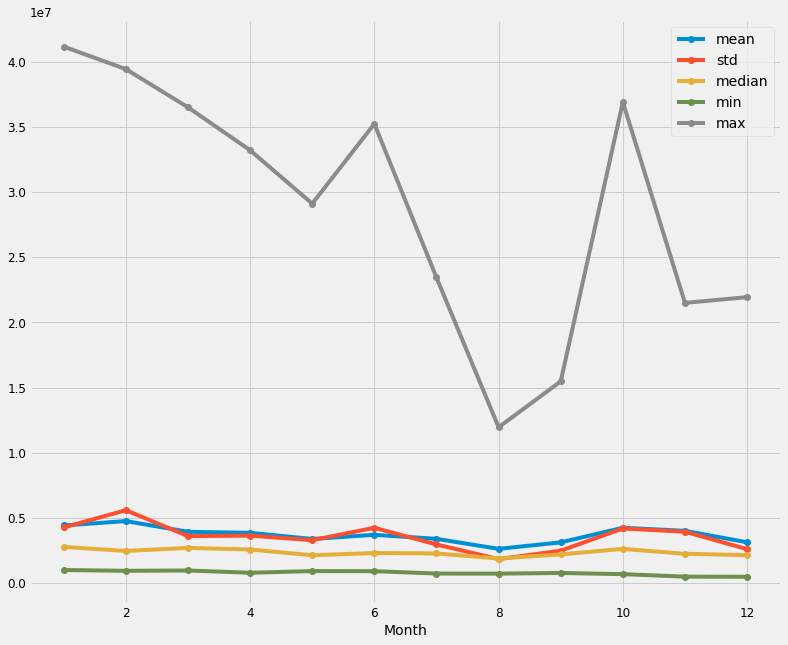

In [34]:
#Stats mois par mois
fig, ax = plt.subplots(1,1, figsize=(12, 10))
(summr.set_index('Date')
    .assign(month = lambda df3:df3.index.month)
     .groupby('month')['Volume'].agg(["mean", "std", "median", "min", "max"])
     .plot(ax = ax, marker = "o"))
ax.set_xlabel("Month")

In [35]:
df2

,Date,Close,Open,High,Low,Volume,Change(%),year,month,day,weekday
0,2004-08-20,54.2,50.8,54.6,50.3,11430000.0,7.95,2004,8,4,Friday
1,2004-08-23,54.8,55.4,56.8,54.6,9140000.0,1.00,2004,8,0,Monday
2,2004-08-24,52.5,55.7,55.8,51.8,7630000.0,-4.13,2004,8,1,Tuesday
3,2004-08-25,53.0,52.5,54.0,52.0,4600000.0,1.07,2004,8,2,Wednesday
4,2004-08-26,54.0,52.5,54.0,52.4,3550000.0,1.81,2004,8,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
4335,2021-11-05,2977.0,2983.4,3006.6,2963.9,1920000.0,0.39,2021,11,4,Friday
4336,2021-11-08,2980.6,2996.5,3012.3,2968.6,1150000.0,0.12,2021,11,0,Monday
4337,2021-11-09,2978.4,2984.7,2996.7,2944.9,972090.0,-0.08,2021,11,1,Tuesday
4338,2021-11-10,2917.9,2950.0,2961.4,2890.8,1480000.0,-2.03,2021,11,2,Wednesday


In [36]:
worst_stock = df2.sort_values('Open').head(5)
worst_stock

,Date,Close,Open,High,Low,Volume,Change(%),year,month,day,weekday
9,2004-09-02,50.8,49.6,51.2,49.5,7570000.0,1.26,2004,9,3,Thursday
12,2004-09-08,51.2,50.4,51.6,50.3,2500000.0,0.71,2004,9,2,Wednesday
11,2004-09-07,50.8,50.5,51.0,49.8,2930000.0,1.58,2004,9,1,Tuesday
10,2004-09-03,50.0,50.5,50.9,49.7,2580000.0,-1.48,2004,9,4,Friday
0,2004-08-20,54.2,50.8,54.6,50.3,11430000.0,7.95,2004,8,4,Friday


In [37]:
Best_stock = df2.sort_values('Open', ascending=False).head(5)
Best_stock

,Date,Close,Open,High,Low,Volume,Change(%),year,month,day,weekday
4336,2021-11-08,2980.6,2996.5,3012.3,2968.6,1150000.0,0.12,2021,11,0,Monday
4337,2021-11-09,2978.4,2984.7,2996.7,2944.9,972090.0,-0.08,2021,11,1,Tuesday
4335,2021-11-05,2977.0,2983.4,3006.6,2963.9,1920000.0,0.39,2021,11,4,Friday
4331,2021-11-01,2869.9,2960.9,2960.9,2864.5,2310000.0,-3.07,2021,11,0,Monday
4338,2021-11-10,2917.9,2950.0,2961.4,2890.8,1480000.0,-2.03,2021,11,2,Wednesday


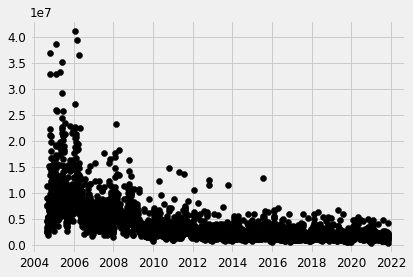

In [38]:

plt.scatter(df2['Date'], df['Volume'],  color='black')
plt.show()

In [39]:
df3['Ticks'] = range(0, len(df3.index.values))

In [40]:
df3

,Close,Open,High,Low,Volume,Change(%),year,month,day,weekday,Ticks
Date,,,,,,,,,,,
2004-08-20,54.2,50.8,54.6,50.3,11430000.0,7.95,2004,8,4,Friday,0
2004-08-23,54.8,55.4,56.8,54.6,9140000.0,1.00,2004,8,0,Monday,1
2004-08-24,52.5,55.7,55.8,51.8,7630000.0,-4.13,2004,8,1,Tuesday,2
2004-08-25,53.0,52.5,54.0,52.0,4600000.0,1.07,2004,8,2,Wednesday,3
2004-08-26,54.0,52.5,54.0,52.4,3550000.0,1.81,2004,8,3,Thursday,4
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05,2977.0,2983.4,3006.6,2963.9,1920000.0,0.39,2021,11,4,Friday,4335
2021-11-08,2980.6,2996.5,3012.3,2968.6,1150000.0,0.12,2021,11,0,Monday,4336
2021-11-09,2978.4,2984.7,2996.7,2944.9,972090.0,-0.08,2021,11,1,Tuesday,4337


<ipython-input-41-fc8fa1c85e04>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


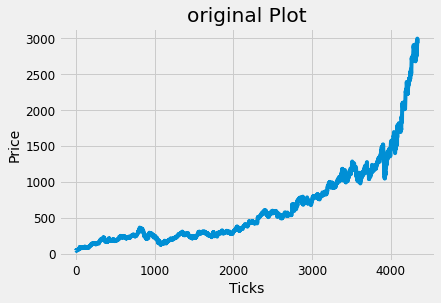

In [41]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('original Plot')
ax1.plot('Ticks', 'Open', data =df3)
fig.show()

In [42]:
df3['Rolling_Mean'] = df3['Open'].rolling(window = 80).mean()
df3

,Close,Open,High,Low,Volume,Change(%),year,month,day,weekday,Ticks,Rolling_Mean
Date,,,,,,,,,,,,
2004-08-20,54.2,50.8,54.6,50.3,11430000.0,7.95,2004,8,4,Friday,0,NaN
2004-08-23,54.8,55.4,56.8,54.6,9140000.0,1.00,2004,8,0,Monday,1,NaN
2004-08-24,52.5,55.7,55.8,51.8,7630000.0,-4.13,2004,8,1,Tuesday,2,NaN
2004-08-25,53.0,52.5,54.0,52.0,4600000.0,1.07,2004,8,2,Wednesday,3,NaN
2004-08-26,54.0,52.5,54.0,52.4,3550000.0,1.81,2004,8,3,Thursday,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05,2977.0,2983.4,3006.6,2963.9,1920000.0,0.39,2021,11,4,Friday,4335,2779.05125
2021-11-08,2980.6,2996.5,3012.3,2968.6,1150000.0,0.12,2021,11,0,Monday,4336,2784.59125
2021-11-09,2978.4,2984.7,2996.7,2944.9,972090.0,-0.08,2021,11,1,Tuesday,4337,2790.37750


In [43]:
filter_roll = df3[(df3['Ticks'] >=900) & (df3['Ticks'] <=1100)]


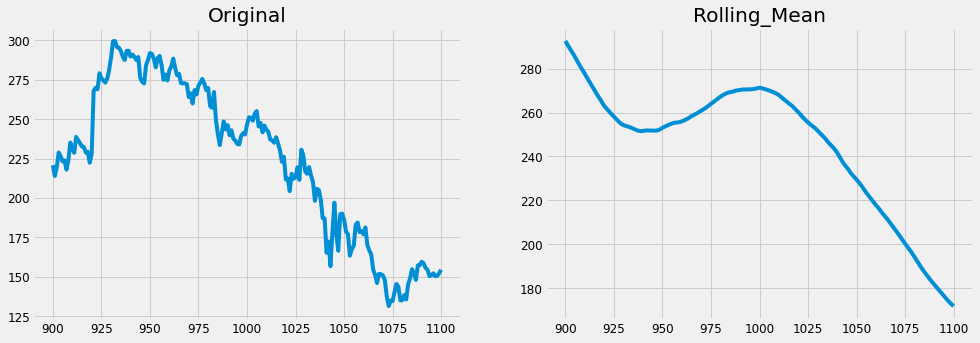

In [44]:
fig, axes = plt.subplots(nrows = 1, ncols=2 , figsize = (15,5));
axes[0].plot('Ticks', 'Open', data = filter_roll);
axes[0].set_title('Original');
axes[1].plot('Ticks', 'Rolling_Mean', data = filter_roll);
axes[1].set_title('Rolling_Mean');

In [45]:
# On crée un copy de df3 mais avec le ticks comme index
df3_ticks = df3.copy()
df3_ticks['date'] = df3_ticks.index
df3_ticks.index = df3_ticks['Ticks']
del df3_ticks['Ticks']
df3_ticks.head()

,Close,Open,High,Low,Volume,Change(%),year,month,day,weekday,Rolling_Mean,date
Ticks,,,,,,,,,,,,
0,54.2,50.8,54.6,50.3,11430000.0,7.95,2004,8,4,Friday,NaN,2004-08-20
1,54.8,55.4,56.8,54.6,9140000.0,1.00,2004,8,0,Monday,NaN,2004-08-23
2,52.5,55.7,55.8,51.8,7630000.0,-4.13,2004,8,1,Tuesday,NaN,2004-08-24
3,53.0,52.5,54.0,52.0,4600000.0,1.07,2004,8,2,Wednesday,NaN,2004-08-25
4,54.0,52.5,54.0,52.4,3550000.0,1.81,2004,8,3,Thursday,NaN,2004-08-26


In [46]:
fit1 = SimpleExpSmoothing(df3_ticks.Open).fit(smoothing_level = 0.2, optimized = False)
fcast1 = fit1.forecast(250).rename(r'$\alpha=0.2$')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:xlabel='Ticks'>

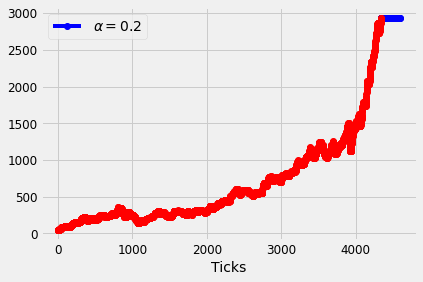

In [47]:
fcast1.plot(marker='o', color = 'blue', legend = True)
fit1.fittedvalues.plot(marker = 'o', color = 'red')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


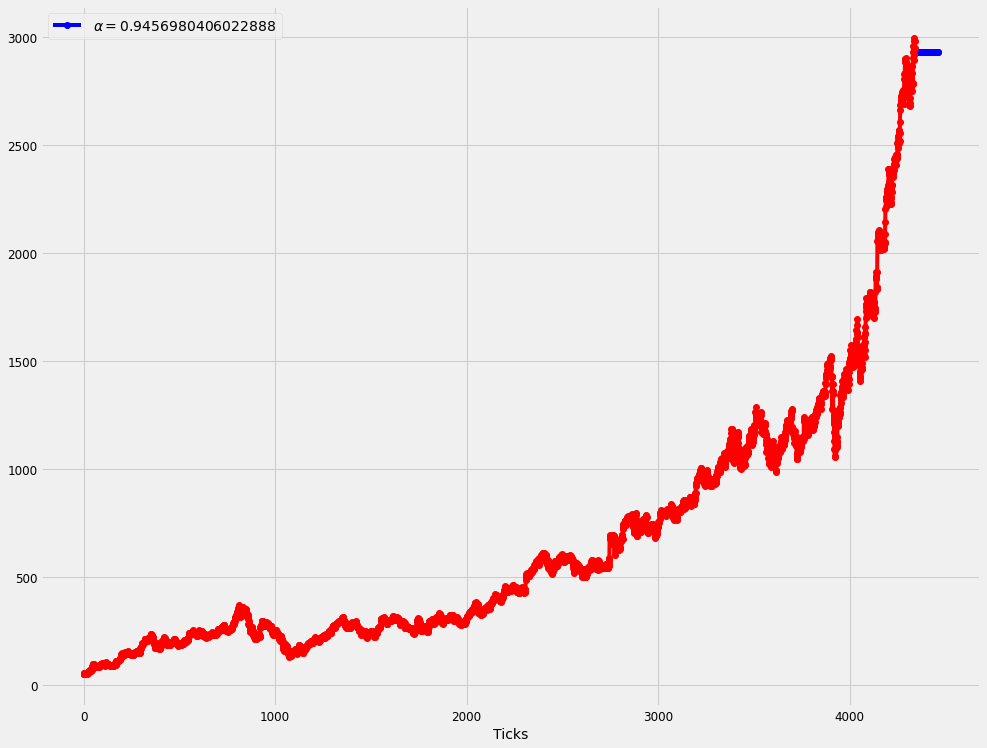

In [48]:
fig = plt.subplots(figsize = (15,12));
fit3 = SimpleExpSmoothing(df3_ticks.Open).fit()
fcast = fit3.forecast(120).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
fcast.plot(marker='o',color = 'blue', legend = True)
fit3.fittedvalues.plot(marker='o',color = 'red')
plt.show()

In [49]:
y = df3['Open'].resample('MS').mean()

In [50]:
y

Date
2004-08-01      53.125000
2004-09-01      56.038095
2004-10-01      76.300000
2004-11-01      89.257143
2004-12-01      90.800000
                 ...     
2021-07-01    2567.914286
2021-08-01    2760.677273
2021-09-01    2831.833333
2021-10-01    2792.461905
2021-11-01    2950.966667
Freq: MS, Name: Open, Length: 208, dtype: float64

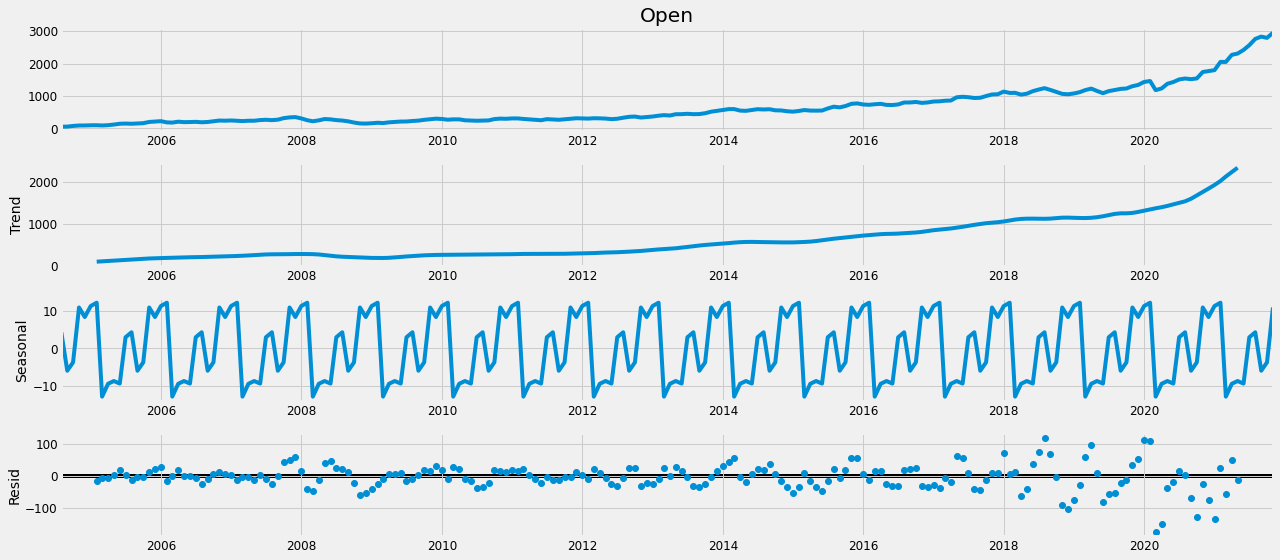

In [51]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

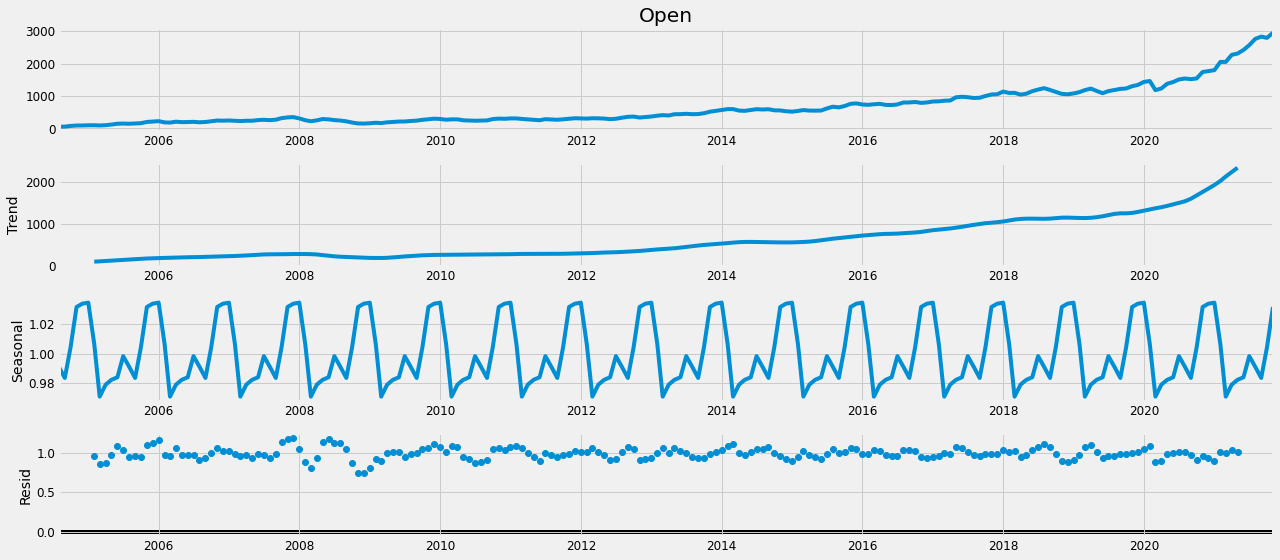

In [52]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

In [53]:
df3

,Close,Open,High,Low,Volume,Change(%),year,month,day,weekday,Ticks,Rolling_Mean
Date,,,,,,,,,,,,
2004-08-20,54.2,50.8,54.6,50.3,11430000.0,7.95,2004,8,4,Friday,0,NaN
2004-08-23,54.8,55.4,56.8,54.6,9140000.0,1.00,2004,8,0,Monday,1,NaN
2004-08-24,52.5,55.7,55.8,51.8,7630000.0,-4.13,2004,8,1,Tuesday,2,NaN
2004-08-25,53.0,52.5,54.0,52.0,4600000.0,1.07,2004,8,2,Wednesday,3,NaN
2004-08-26,54.0,52.5,54.0,52.4,3550000.0,1.81,2004,8,3,Thursday,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05,2977.0,2983.4,3006.6,2963.9,1920000.0,0.39,2021,11,4,Friday,4335,2779.05125
2021-11-08,2980.6,2996.5,3012.3,2968.6,1150000.0,0.12,2021,11,0,Monday,4336,2784.59125
2021-11-09,2978.4,2984.7,2996.7,2944.9,972090.0,-0.08,2021,11,1,Tuesday,4337,2790.37750


In [54]:
# Select only the important features i.e. the date and price
data = df2[["Date","Volume"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Volume":"y"}) #renaming the columns of the dataset
data

,ds,y
0,2004-08-20,11430000.0
1,2004-08-23,9140000.0
2,2004-08-24,7630000.0
3,2004-08-25,4600000.0
4,2004-08-26,3550000.0
...,...,...
4335,2021-11-05,1920000.0
4336,2021-11-08,1150000.0
4337,2021-11-09,972090.0
4338,2021-11-10,1480000.0


In [55]:
"""from statsmodels.tsa.stattools import adfuller
rolmean = data.rolling(window = 8, center = False).mean()
rolstd = data.rolling(window = 8, center = False).std()

dftest = adfuller(data['y'])
fig = plt.figure(figsize=(12,6))
orig = plt.plot(data, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label= 'RollingMean')
std = plt.plot(rolstd, color = 'red', label= 'Rolling std')
plt.legend(loc = 'best')

print('Results of Dickey-Fuller Test')
dfoutput = pd.Series(data[0:4], index = ['Test Statistic', 'p-value', 'lags Used', 'Nber of Observ. used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value
print(dfoutput)"""

"from statsmodels.tsa.stattools import adfuller\nrolmean = data.rolling(window = 8, center = False).mean()\nrolstd = data.rolling(window = 8, center = False).std()\n\ndftest = adfuller(data['y'])\nfig = plt.figure(figsize=(12,6))\norig = plt.plot(data, color = 'blue', label = 'Original')\nmean = plt.plot(rolmean, color = 'red', label= 'RollingMean')\nstd = plt.plot(rolstd, color = 'red', label= 'Rolling std')\nplt.legend(loc = 'best')\n\nprint('Results of Dickey-Fuller Test')\ndfoutput = pd.Series(data[0:4], index = ['Test Statistic', 'p-value', 'lags Used', 'Nber of Observ. used'])\nfor key, value in dftest[4].items():\n    dfoutput['Critical Value(%s)'%key] = value\nprint(dfoutput)"

In [56]:
from statsmodels.tsa.arima_model import ARIMA

In [57]:
y[0:10]

Date
2004-08-01     53.125000
2004-09-01     56.038095
2004-10-01     76.300000
2004-11-01     89.257143
2004-12-01     90.800000
2005-01-01     96.815000
2005-02-01     97.978947
2005-03-01     90.927273
2005-04-01     99.571429
2005-05-01    118.909524
Freq: MS, Name: Open, dtype: float64

In [58]:
len(y)

208

In [59]:
model = ARIMA(y, order = (5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                  207
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1088.242
Method:                       css-mle   S.D. of innovations             46.401
Date:                Mon, 31 Jan 2022   AIC                           2190.483
Time:                        20:49:02   BIC                           2213.812
Sample:                    09-01-2004   HQIC                          2199.917
                         - 11-01-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.5166      6.960      2.229      0.026       1.874      29.159
ar.L1.D.Open     0.1726      0.069      2.505      0.012       0.038       0.308
ar.L2.D.Open    -0.0046      0.071     -0.06

In [60]:
from pandas import DataFrame

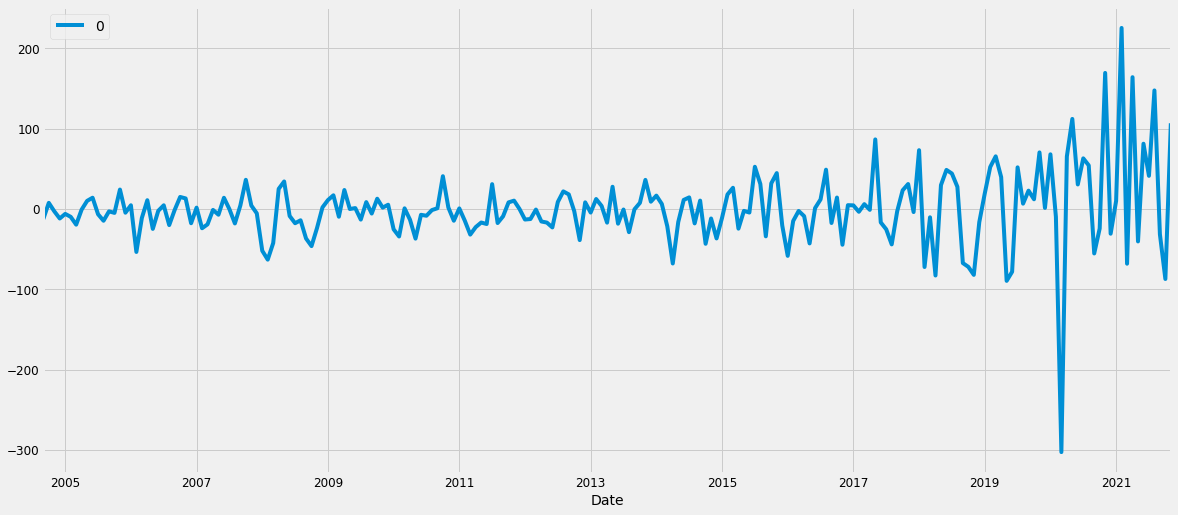

In [61]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

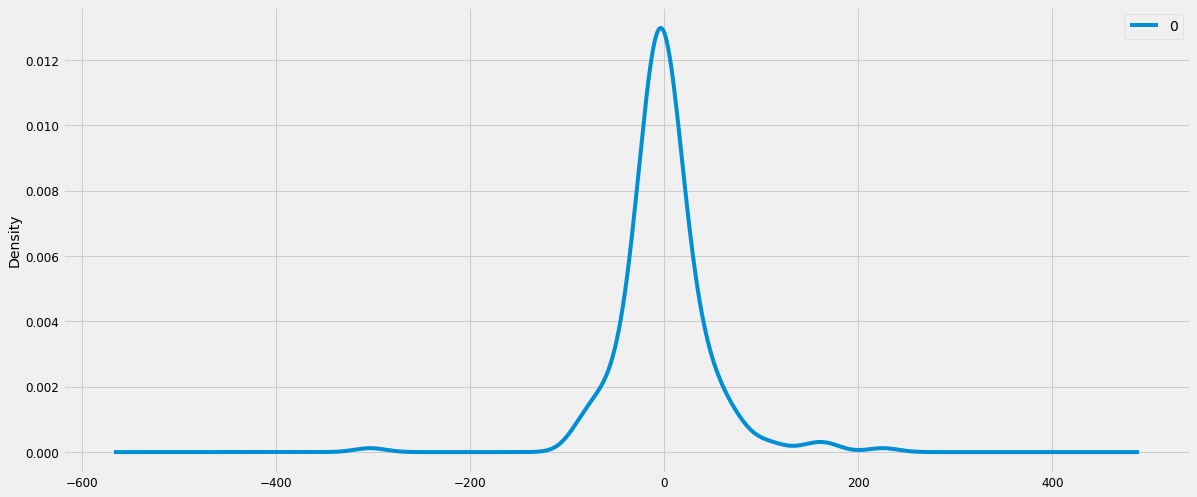

                0
count  207.000000
mean     0.068181
std     46.514793
min   -302.721124
25%    -17.826508
50%     -1.470377
75%     13.883823
max    225.255634


In [62]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [63]:
y

Date
2004-08-01      53.125000
2004-09-01      56.038095
2004-10-01      76.300000
2004-11-01      89.257143
2004-12-01      90.800000
                 ...     
2021-07-01    2567.914286
2021-08-01    2760.677273
2021-09-01    2831.833333
2021-10-01    2792.461905
2021-11-01    2950.966667
Freq: MS, Name: Open, Length: 208, dtype: float64

In [64]:
y_ticks = y.copy()
y_ticks.index = range(0, len(y_ticks))
y_ticks


0        53.125000
1        56.038095
2        76.300000
3        89.257143
4        90.800000
          ...     
203    2567.914286
204    2760.677273
205    2831.833333
206    2792.461905
207    2950.966667
Name: Open, Length: 208, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=950.022521, expected=938.100000
predicted=948.254229, expected=945.310000
predicted=958.298451, expected=998.618182
predicted=1020.829620, expected=1046.300000
predicted=1053.210658, expected=1054.240000
predicted=1046.546510, expected=1136.061905
predicted=1168.069106, expected=1093.894737
predicted=1082.864227, expected=1097.742857
predicted=1099.431842, expected=1042.685714
predicted=1053.315290, expected=1070.554545
predicted=1078.609554, expected=1148.376190
predicted=1178.167058, expected=1197.509524
predicted=1198.162061, expected=1241.800000
predicted=1238.827050, expected=1185.994737
predicted=1170.438179, expected=1125.926087
predicted=1118.690265, expected=1065.176190
predicted=1076.474346, expected=1052.478947
predicted=1075.111992, expected=1078.023810
predicted=1104.550885, expected=1120.121053
predicted=1137.755696, expected=1182.333333
predicted=1196.651084, expected=1228.014286
predicted=1232.811725, expected=1155.845455
predicted=1120.882805, expected=1086.2

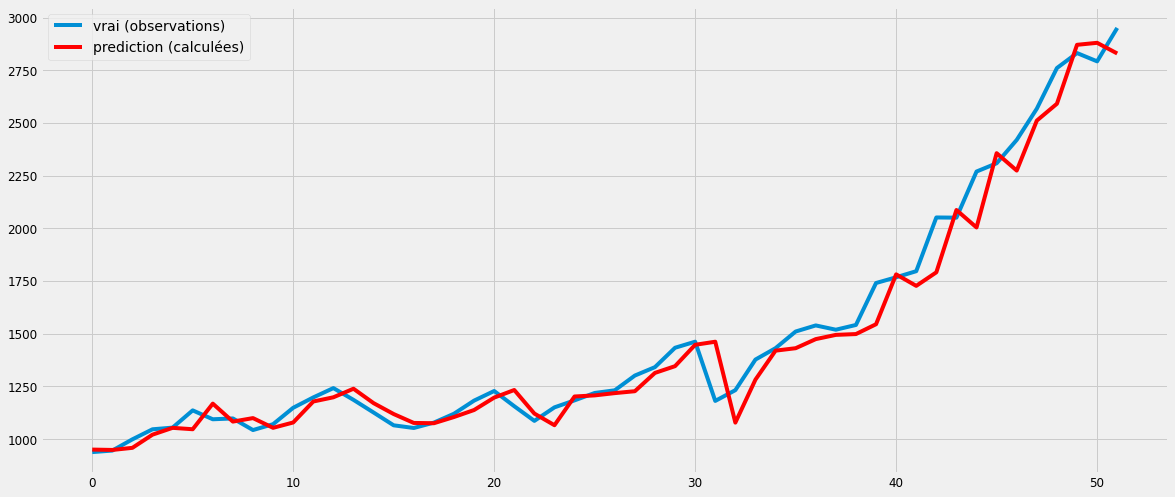

In [65]:
X = y_ticks

size = int(len(X) * 0.75)#75%% training & 25% test
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    #print(test)
    obs = test[t+size]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# compare the 25% tested values with predicted values
plt.plot(list(test),label="vrai (observations)")
plt.plot(predictions, color='red', label= 'prediction (calculées)')
plt.legend()
plt.show()

In [66]:
interrupt 

NameError: name 'interrupt' is not defined

In [ ]:
df3

In [ ]:
import seaborn as sns
import numpy as np
df3["open_mean"] = df3["Open"].mean()

sns.lineplot(x=df3.index, y=df3["Open"], color="blue")
sns.lineplot(x=df3.index, y=df3["open_mean"], color="red")

MSE = np.mean((df3["Open"]-df3["open_mean"])**2)
print("The MSE for this global average smoothing is : \n {}".format(MSE))

In [ ]:
y = df3["Open"]
MA7 = y.rolling(window=7)
df3["Open_MA_7"] = MA7.mean()

sns.lineplot(x=df3.index, y=df3["Open"], color="blue")
sns.lineplot(x=df3.index, y=df3["Open_MA_7"], color="red")

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from datetime import datetime, timedelta

SES = SimpleExpSmoothing(df3["Open"])
SES_fit = SES.fit(0.1)
SES_predict = SES_fit.predict(start=0, end = len(df3)+30)
sns.lineplot(x=range(len(df3)), y=df3["Open"], color="blue")
sns.lineplot(x=SES_predict.index, y=SES_predict, color="red")

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from datetime import datetime, timedelta

SES = SimpleExpSmoothing(df3["Open"])
SES_fit = SES.fit(0.1)
SES_predict = SES_fit.predict(start=0, end = len(df3)+30)
sns.lineplot(x=range(len(df3)), y=df3["Open"], color="blue")
sns.lineplot(x=SES_predict.index, y=SES_predict, color="red")

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
TES = ExponentialSmoothing(y, trend = 'add', seasonal = 'add', seasonal_periods = 20)
TES_fit = TES.fit()
TES_predict = TES_fit.predict(start=0, end = len(df3)+60)


sns.lineplot(x=range(len(df3)), y=df3["Open"], color="blue")
sns.lineplot(x=TES_predict.index, y=TES_predict, color="red")